In [37]:
import os
import random

import matplotlib
import torch
import torchvision.transforms as transforms
from einops import rearrange, reduce, repeat
from matplotlib import pyplot as plt
from torchvision.datasets import CIFAR10

In [38]:
# Set CMAP to gray
matplotlib.rcParams["image.cmap"] = "gray"

In [39]:
train_data = CIFAR10(
    root=os.path.join("..", "data", "tmp", "cifar"),
    download=True,
    train=True,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,)),
        ]
    ),
)

X = train_data.data
X = torch.tensor(X) / 255

In [40]:
# Load 16 images
samples = X[:6]
samples.shape

torch.Size([6, 32, 32, 3])

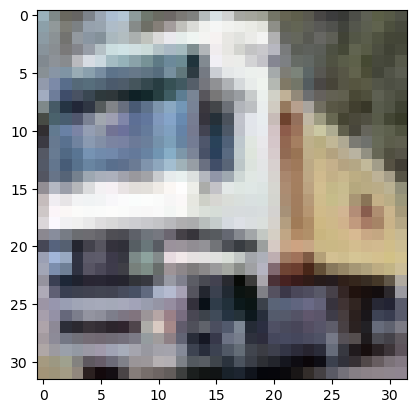

In [41]:
idx = random.randint(0, len(samples))
sample = X[idx]
plt.imshow(sample)

# Rearrange

## Play with axes

tensor(True)


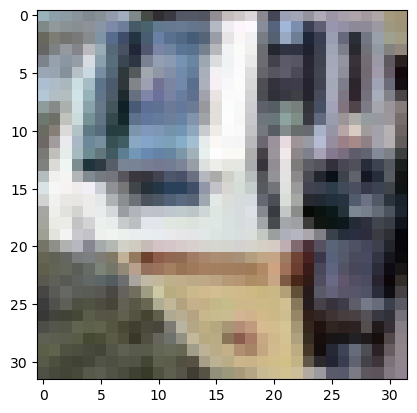

In [42]:
# Transpose width and height
res = rearrange(sample, "h w c -> w h c")
res2 = sample.permute(1, 0, 2)

print(torch.all(res == res2))

plt.imshow(res)

tensor(True)
torch.Size([192, 32, 3])


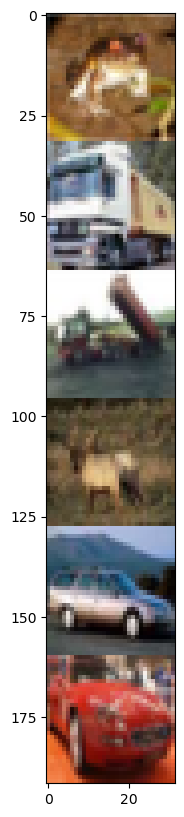

In [43]:
# Concatenate over height
res = rearrange(samples, "b h w c -> (b h) w c")
res2 = torch.vstack(tuple(samples))
# This works too
# res2 = torch.cat(tuple(samples))

print(torch.all(res == res2))
print(res.shape)

plt.figure(figsize=(5, 10))
plt.imshow(res)
plt.show()

tensor(True)
torch.Size([32, 192, 3])


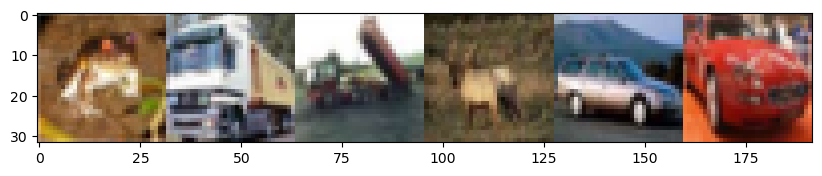

In [44]:
# Concatenate over width - new width = (b * w)
res = rearrange(samples, "b h w c ->  h (b w) c")
res2 = torch.hstack(tuple(samples))
# this works too
# res2 = torch.cat(tuple(samples), axis=1)

print(torch.all(res == res2))
print(res.shape)

plt.figure(figsize=(10, 5))
plt.imshow(res)
plt.show()

In [45]:
res = rearrange(samples, "b h w c -> (b h w c)")
res2 = torch.flatten(samples)

all(res == res2)

True

In [46]:
# Decompose b -> (b1, b2)
res = rearrange(samples, "(b1 b2) h w c -> b1 b2 h w c", b1=2, b2=3)
print(res.shape)

torch.Size([2, 3, 32, 32, 3])


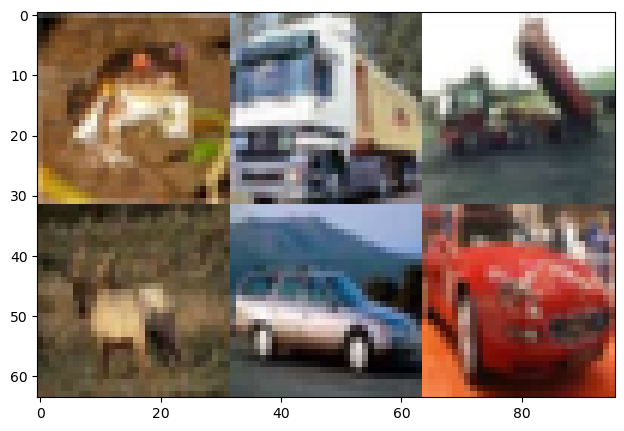

In [47]:
# Decompose b -> (b1, b2) and stack (b1 h) and (b2 w)
res = rearrange(samples, "(b1 b2) h w c -> (b1 h) (b2 w) c", b1=2, b2=3)

plt.figure(figsize=(10, 5))
plt.imshow(res)
plt.show()

In [48]:
# Decompose width into 2 x 16
res = rearrange(samples, "b h (w1 w2) c -> h w2 b w1 c", w1=16, w2=2)
print(samples.shape)
print(res.shape)

torch.Size([6, 32, 32, 3])
torch.Size([32, 2, 6, 16, 3])


torch.Size([64, 96, 3])


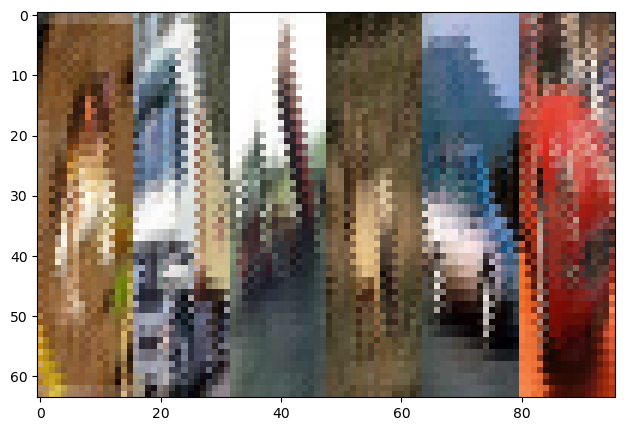

In [49]:
# decompose width w = w1 * w2 = 16 * 2.
# Then the new height becomes h * w2 = 32 * 2 = 64
# and the new width is b * w1 = 6 * 16 = 96
res = rearrange(samples, "b h (w1 w2) c -> (h w2) (b w1) c", w1=16, w2=2)

print(res.shape)

plt.figure(figsize=(10, 5))
plt.imshow(res)
plt.show()

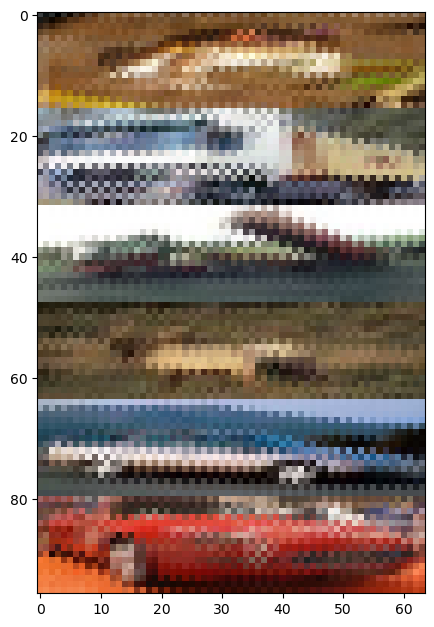

In [50]:
res = rearrange(samples, "b (h1 h2) w c -> (b h1) (w h2)  c", h1=16, h2=2)

plt.figure(figsize=(5, 10))
plt.imshow(res)
plt.show()

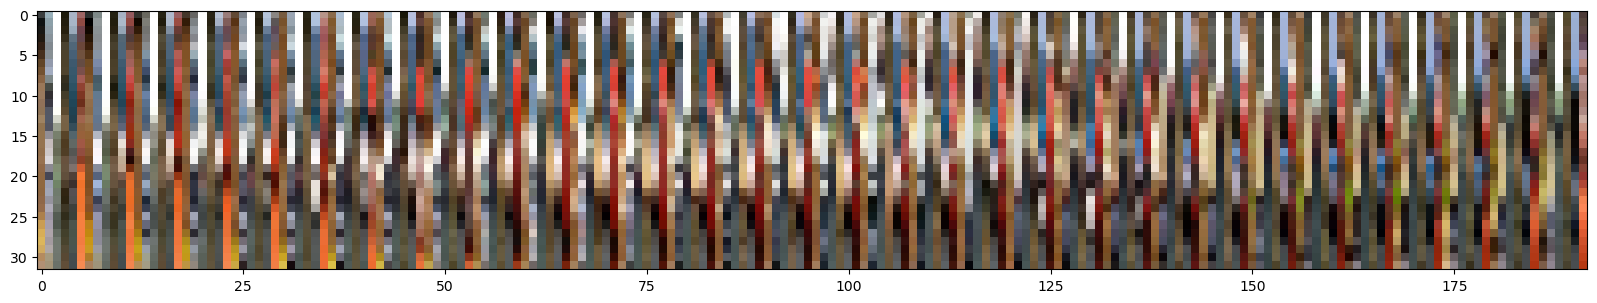

In [51]:
# Order matters
res = rearrange(samples, "b h w c -> h (w b) c")

plt.figure(figsize=(20, 5))
plt.imshow(res)
plt.show()

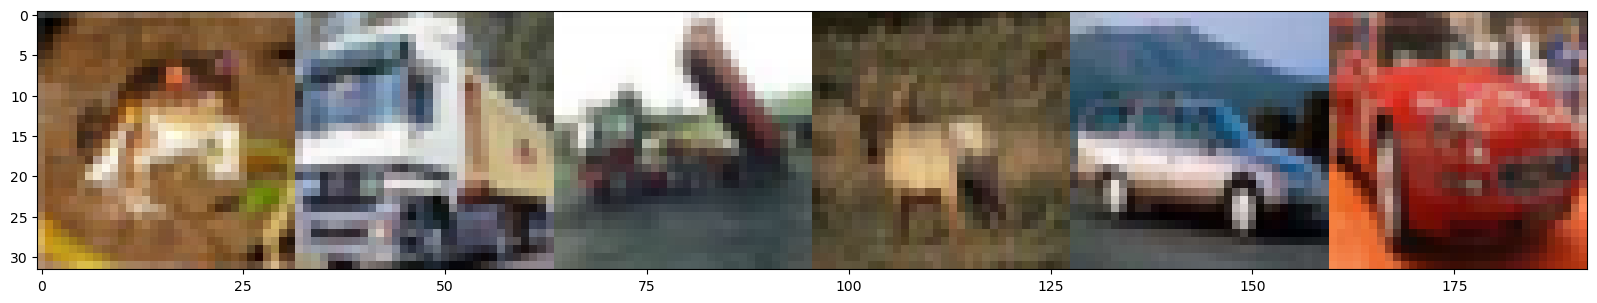

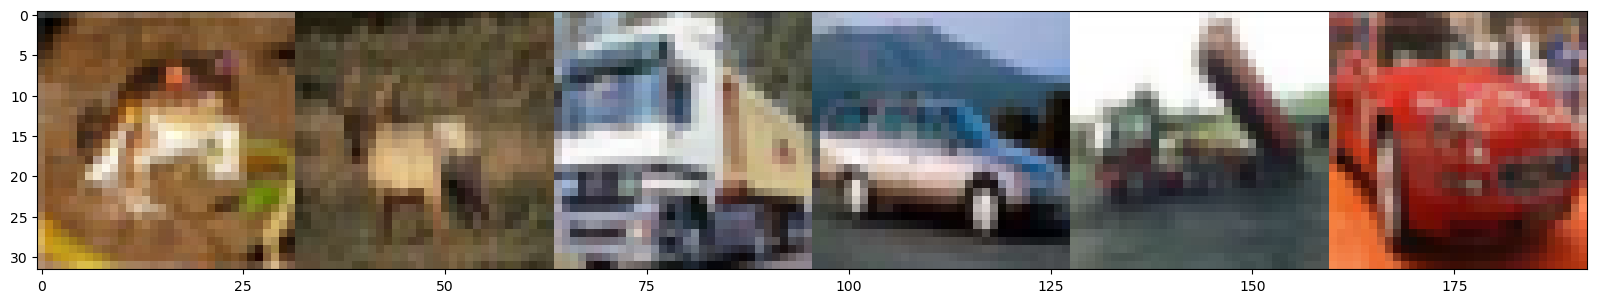

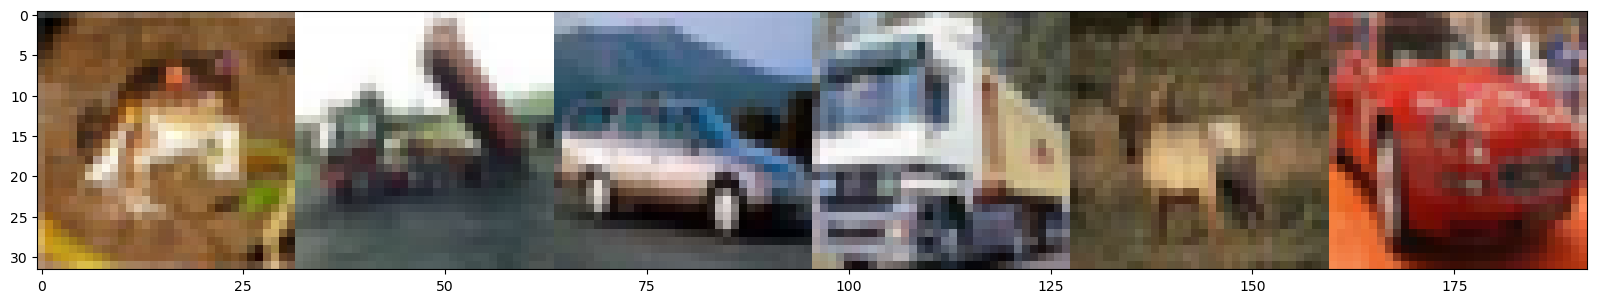

In [52]:
# Normal order
res = rearrange(samples, "b h w c -> h (b w) c")

plt.figure(figsize=(20, 5))
plt.imshow(res)
plt.show()

res = rearrange(samples, "(b1 b2) h w c -> h (b2 b1 w) c", b1=2, b2=3)

plt.figure(figsize=(20, 5))
plt.imshow(res)
plt.show()

res = rearrange(samples, "(b1 b2) h w c -> h (b2 b1 w) c", b1=3, b2=2)

plt.figure(figsize=(20, 5))
plt.imshow(res)
plt.show()

## Add and remove axes

In [53]:
res = rearrange(samples, "b h w c -> b 1 h w 1 c")
print(res.shape)

res = rearrange(res, "b 1 h w 1 c -> b h w c")
print(res.shape)

torch.Size([6, 1, 32, 32, 1, 3])
torch.Size([6, 32, 32, 3])


## Channelshuffle

In [54]:
t = torch.stack([torch.ones(32, 32) * v for v in torch.linspace(1, 256, 16) / 256])

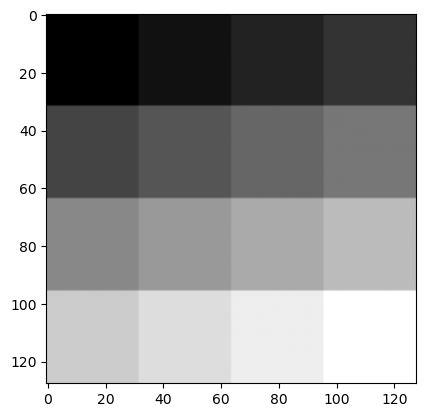

In [55]:
r = rearrange(t, "(c1 c2) h w -> (c1 h) (c2 w)", c1=4)
plt.imshow(r)

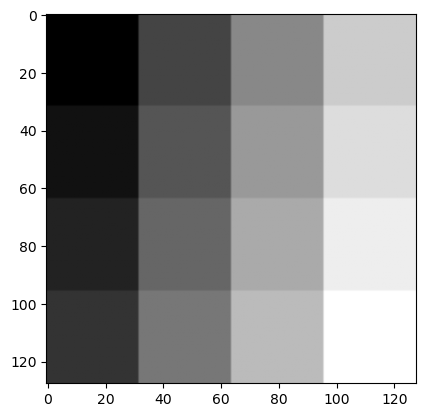

In [56]:
res = rearrange(t, "(g1 g2 c) h w -> (g2 g1 c) h w", g1=4, g2=4)

r = rearrange(res, "(c1 c2) h w -> (c1 h) (c2 w)", c1=4)
plt.imshow(r)

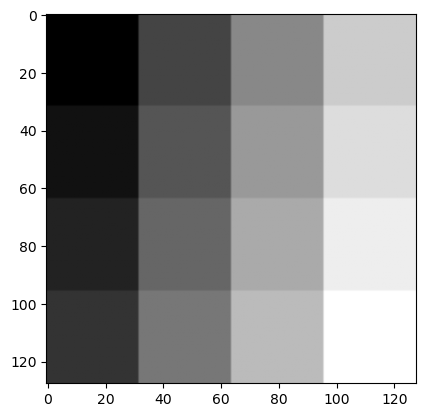

In [57]:
res = rearrange(t, "(g c) h w -> (c g) h w", g=4)

r = rearrange(res, "(c1 c2) h w -> (c1 h) (c2 w)", c1=4)
plt.imshow(r)

# Reduce

In [58]:
# Mean over channels
res = reduce(samples, "b h w c -> b h w", reduction="mean")

print(res.shape)

torch.Size([6, 32, 32])


torch.Size([32, 32, 3])


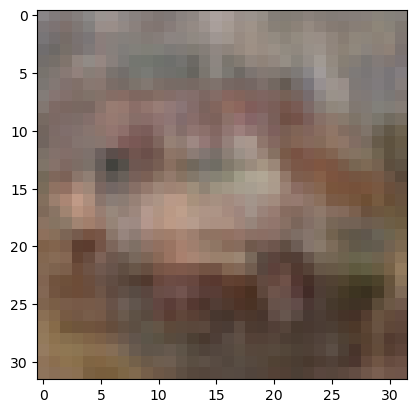

In [59]:
# Mean over batch
res = reduce(samples, "b h w c ->  h w c", "mean")

print(res.shape)

plt.imshow(res)
plt.show()

torch.Size([32, 32, 3])


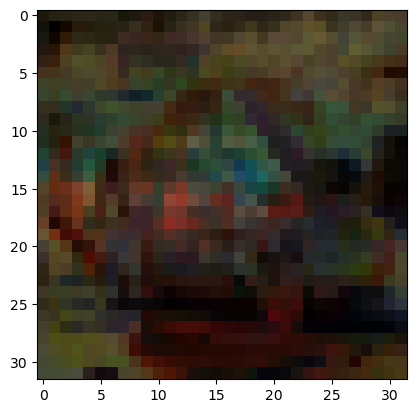

In [60]:
# Mean over batch
res = reduce(samples, "b h w c ->  h w c", "min")

print(res.shape)

plt.imshow(res)
plt.show()

torch.Size([6, 16, 16, 3])


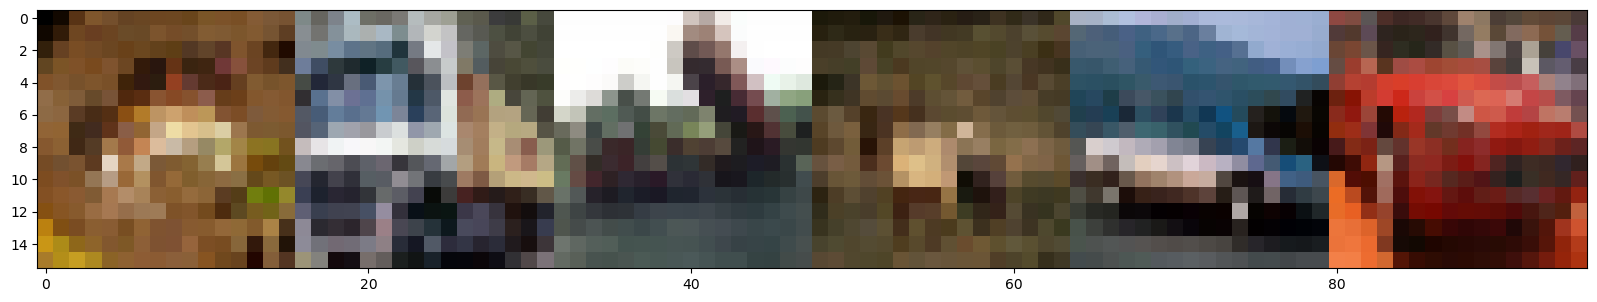

In [61]:
# min pooling with a 2x2 kernel
res = reduce(samples, "b (h h2) (w w2) c -> b h w c", "min", h2=2, w2=2)

print(res.shape)
res = rearrange(res, "b h w c -> h (b w) c")

plt.figure(figsize=(20, 5))
plt.imshow(res)
plt.show()

In [62]:
# Max over the dimension marked with ()
res = reduce(samples, "b h w c -> b () () c", "max")
print(res.shape)

torch.Size([6, 1, 1, 3])


In [63]:
# Similar
res = reduce(samples, "b h w c -> b 1 1 c", "max")
print(res.shape)

torch.Size([6, 1, 1, 3])


# Repeat

In [64]:
sample = samples[0]

torch.Size([32, 5, 32, 3])


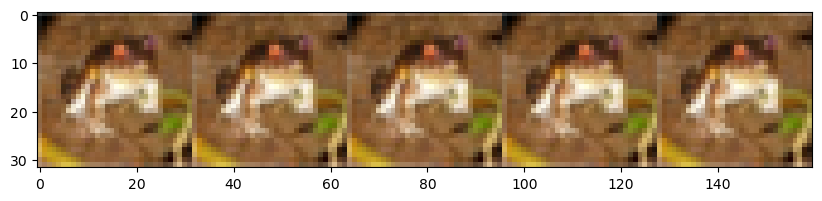

In [65]:
# Repeat element in a new axis

res = repeat(sample, "h w c -> h new_axis w c", new_axis=5)
print(res.shape)

res = rearrange(res, "h n w c -> h (n w) c")
plt.figure(figsize=(10, 5))
plt.imshow(res)
plt.show()

torch.Size([32, 160, 3])


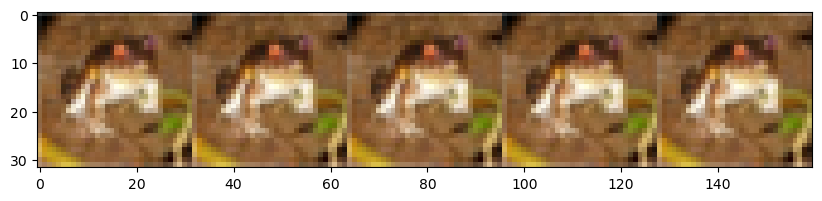

In [66]:
# Repeat over existing axis

res = repeat(sample, "h w c -> h (r w) c", r=5)
print(res.shape)

plt.figure(figsize=(10, 5))
plt.imshow(res)
plt.show()

torch.Size([32, 160, 3])


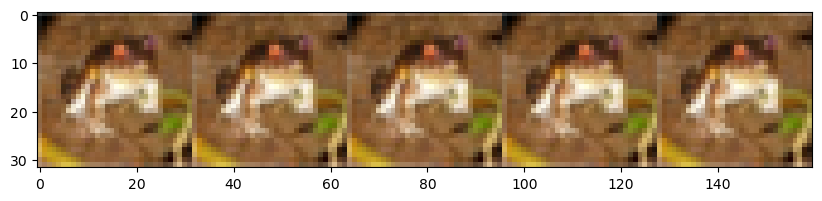

In [67]:
# Shortcut

res = repeat(sample, "h w c -> h (5 w) c")
print(res.shape)

plt.figure(figsize=(10, 5))
plt.imshow(res)
plt.show()

torch.Size([32, 160, 3])


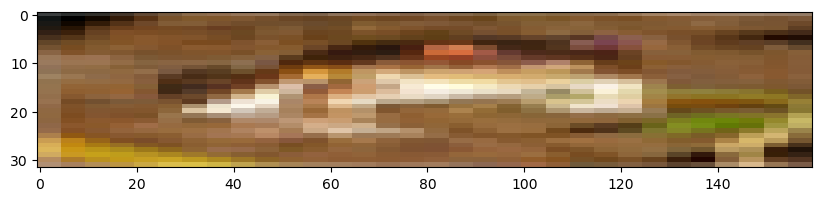

In [68]:
# Order matters.
res = repeat(sample, "h w c -> h (w 5) c")
print(res.shape)

plt.figure(figsize=(10, 5))
plt.imshow(res)
plt.show()

## Utils

In [69]:
from einops import asnumpy, parse_shape

In [70]:
parse_shape(samples, "batch h w c")

{'batch': 6, 'h': 32, 'w': 32, 'c': 3}

In [71]:
parse_shape(samples, "batch _ _ c")

{'batch': 6, 'c': 3}

In [72]:
# Converts tensor and also pulls from gpu if needed.

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
t = torch.randn(10, 1024, 3).to(device)
res = asnumpy(t)

type(res)

cuda


numpy.ndarray